In [1]:
from datetime import datetime
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.random_search import RandomSearch
from pymoo.optimize import minimize
from urllib.parse import urlparse
from html.parser import HTMLParser
from poly_sbst.common.random_seed import get_random_seed
from poly_sbst.sampling.abstract_sampling import AbstractSampling
from pymoo.operators.selection.rnd import RandomSelection
from pymoo.operators.selection.tournament import TournamentSelection
from pymoo.termination import get_termination

import matplotlib.pyplot as plt
import numpy as np



In [2]:
def test_tournament(pop, P, **kwargs):
    winners = []
    for games in P:
        if pop[games[0]]._F[0] < pop[games[1]]._F[0]:
            winners.append(pop[games[0]])
        else:
            winners.append(pop[games[1]])
    return winners

In [ ]:
from poly_sbst.generators.url_test_suite_generator import UrlTestSuiteGenerator
from poly_sbst.common.abstract_executor import AbstractExecutor
from poly_sbst.mutation.url_test_suite_mutation import UrlTestSuiteMutation
from poly_sbst.problems.url_test_suite_problem import UrlTestSuiteProblem
from poly_sbst.crossover.url_crossover import UrlCrossover
#Selection is "T", else is random

def optimize_url_GA(runs=1,evaluations=5000,pop_size=40,selection='R'):
    random_selection = RandomSelection()
    tournament_selection = TournamentSelection(pressure=2, func_comp=test_tournament)        
    
    if selection == 'T':
        print("using tournament")
        m_selection = tournament_selection
    else:
        m_selection = random_selection

    results = []
    for run in range(runs):

        seed = get_random_seed()

        generator = UrlTestSuiteGenerator() 

        executor = AbstractExecutor(urlparse) 
        problem = UrlTestSuiteProblem(executor) 

        method = GA(pop_size=pop_size,
                n_offsprings=int(pop_size/2),
                sampling=AbstractSampling(generator),
                mutation=UrlTestSuiteMutation(generator=generator),
                crossover=UrlCrossover(cross_rate=0.9),
                eliminate_duplicates=False,
                selection = m_selection,
                )
        
        res = minimize(problem,
                method,
                termination=('n_eval', evaluations),
                seed=seed,
                verbose=True,
                eliminate_duplicates=False,
                save_history=True,
                )
        
        f_min = []
        for i in range(len(res.history)):
            f_min.append(res.history[i].output.f_min.value)

        results.append(f_min)
    return results

In [4]:
def plot_GA(results,title):
    for j in range(len(results)):
        plt.plot(np.arange(len(results[j])), results[j], label='run #'+str(j+1))
    plt.xlabel('Generations')
    plt.ylabel('Number of Lines Covered / Number of Tests')
    plt.legend()
    plt.title(title)


In [5]:
def compare_tournament_random_sel(runs=1,evaluations=5000,pop_size=40):
    fig,axs = plt.subplots(1,2,figsize=(12,6))
    plt.subplot(1, 2, 1) 
    results_r = optimize_url_GA(runs,evaluations,pop_size,'R')
    plot_GA(results_r,"Testing urlparse : Evolution with GA and Random Selection")
    plt.subplot(1, 2, 2) 
    results_t = optimize_url_GA(runs,evaluations,pop_size,'T')
    plot_GA(results_t,"Testing urlparse : Evolution with GA and Tournament Selection")
    fig.tight_layout()
    plt.savefig("tournament_random_sel.svg", format="svg")

In [6]:
#compare_tournament_random_sel(5,5000)

Random Search

In [7]:
def optimize_url_RS(runs=1,evaluations=5000,pop_size=40):
    now = datetime.now()
    dt_string = now.strftime("%d-%m-%Y")
    results = []
    for run in range(runs):

        seed = get_random_seed()

        generator = UrlTestSuiteGenerator() 

        executor = AbstractExecutor(urlparse) 
        problem = UrlTestSuiteProblem(executor) 

        method = RandomSearch(n_points_per_iteration=pop_size,
                              sampling=AbstractSampling(generator))

        res = minimize(problem,
                method,
                termination=('n_eval', evaluations),
                seed=seed,
                verbose=True,
                eliminate_duplicates=False,
                save_history=True,
                )
    
        f_min = []
        for i in range(len(res.history)):
            f_min.append(res.history[i].output.f_min.value)

        results.append(f_min)
    return results

In [8]:
def compare_GA_random_search(runs=1,evaluations=5000,pop_size=40):
    fig,axs = plt.subplots(1,2,figsize=(12,6))
    plt.subplot(1, 2, 1) 
    results_RS = optimize_url_RS(runs,evaluations,pop_size)
    plot_GA(results_RS,"Testing urlparse : Evolution with RandomSearch")
    plt.subplot(1, 2, 2) 
    results_GA = optimize_url_GA(runs,evaluations,pop_size,'T')
    plot_GA(results_GA,"Testing urlparse : Evolution with GA and Tournament Selection")
    fig.tight_layout()
    plt.savefig("GA_randomsearch.svg", format="svg")

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       40 | -1.550172E+00 | -2.250000E+00
     2 |       60 | -1.710260E+00 | -2.250000E+00
     3 |       80 | -1.813239E+00 | -2.368421E+00
     4 |      100 | -1.923552E+00 | -2.368421E+00
     5 |      120 | -2.044941E+00 | -2.500000E+00
     6 |      140 | -2.129824E+00 | -2.500000E+00
     7 |      160 | -2.196458E+00 | -2.500000E+00
     8 |      180 | -2.245442E+00 | -2.500000E+00
     9 |      200 | -2.281438E+00 | -2.500000E+00
    10 |      220 | -2.298355E+00 | -2.500000E+00
    11 |      240 | -2.325329E+00 | -2.500000E+00
    12 |      260 | -2.349671E+00 | -2.500000E+00
    13 |      280 | -2.379934E+00 | -2.500000E+00
    14 |      300 | -2.404605E+00 | -2.500000E+00
    15 |      320 | -2.417763E+00 | -2.500000E+00
    16 |      340 | -2.430921E+00 | -2.500000E+00
    17 |      360 | -2.447368E+00 | -2.500000E+00
    18 |      380 | -2.457237E+00 | -2.500000E+00
    19 |      400 | -2.470395E+00 | -2.500000E+00


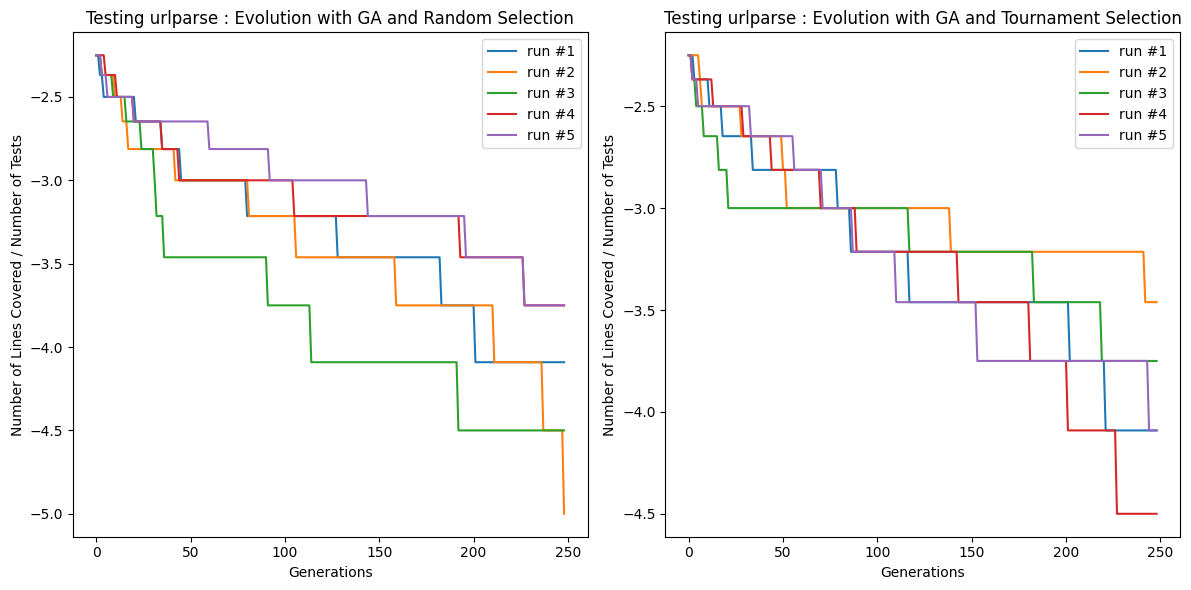

In [9]:
compare_tournament_random_sel(5,5000)

In [ ]:
compare_GA_random_search(5,5000)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       40 | -1.571253E+00 | -2.250000E+00
     2 |       80 | -1.659674E+00 | -2.250000E+00
     3 |      120 | -1.563848E+00 | -2.250000E+00
     4 |      160 | -1.528768E+00 | -2.250000E+00
     5 |      200 | -1.620810E+00 | -2.250000E+00
     6 |      240 | -1.514040E+00 | -2.250000E+00
     7 |      280 | -1.599932E+00 | -2.250000E+00
     8 |      320 | -1.530995E+00 | -2.250000E+00
     9 |      360 | -1.617189E+00 | -2.250000E+00
    10 |      400 | -1.514859E+00 | -2.250000E+00
    11 |      440 | -1.539675E+00 | -2.250000E+00
    12 |      480 | -1.554108E+00 | -2.250000E+00
    13 |      520 | -1.540985E+00 | -2.250000E+00
    14 |      560 | -1.459216E+00 | -2.250000E+00
    15 |      600 | -1.622510E+00 | -2.250000E+00
    16 |      640 | -1.657785E+00 | -2.250000E+00
    17 |      680 | -1.622403E+00 | -2.250000E+00
    18 |      720 | -1.648335E+00 | -2.250000E+00
    19 |      760 | -1.631848E+00 | -2.250000E+00
